In [8]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import ks_2samp

from statsmodels.nonparametric.smoothers_lowess import lowess


import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from mass_ratio_plottingFunctions import param_hist_scatter, param_hist, param_CDF, median_hist
from stat_functions import calculate_shift

In [2]:
#IMAGE_DIR = 'C:/Users/jacob/Documents/GitHub/RotationCurves/images'
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/images'

#master_table = Table.read( 'C:/Users/jacob/Documents/GitHub/RotationCurves/master_file.txt', format='ascii.ecsv')
master_table = Table.read('../spirals/Pipe3D-master_file_vflag_10_smooth2p27_N2O2_noWords.txt', 
                          format='ascii.commented_header')

#### Remove bad galaxies

In [3]:
bad_boolean = master_table['curve_used'] == -99

good_galaxies = master_table[np.logical_not(bad_boolean)]

In [11]:
abundance_boolean = good_galaxies['Z12logOH'] == -99

good_galaxies = good_galaxies[np.logical_not(abundance_boolean)]

#### Split galaxies into "walls" and "voids"

In [12]:
vboolean = good_galaxies['vflag'] == 1
wboolean = good_galaxies['vflag'] == 0

void_table = good_galaxies[vboolean]
wall_table = good_galaxies[wboolean]
other_table = good_galaxies[np.logical_not(vboolean | wboolean)]

### Histogram parameters

In [5]:
hist_range = (8.5, 10.5)
bins = np.linspace( hist_range[0], hist_range[1], 10)

### Initialize table to store the number of galaxies in each bin of the histograms

In [3]:
count_table = Table()

# First column is the bins
count_table['Bins'] = bins[1:]

## Plot formatting

In [6]:
#plt.rc('text', usetex=True)
plt.rc('font', size=16)#family='serif')
lwidth = 2 # Line width used in plots

# $12 + \log(\text{O/H})$ distribution

<IPython.core.display.Javascript object>


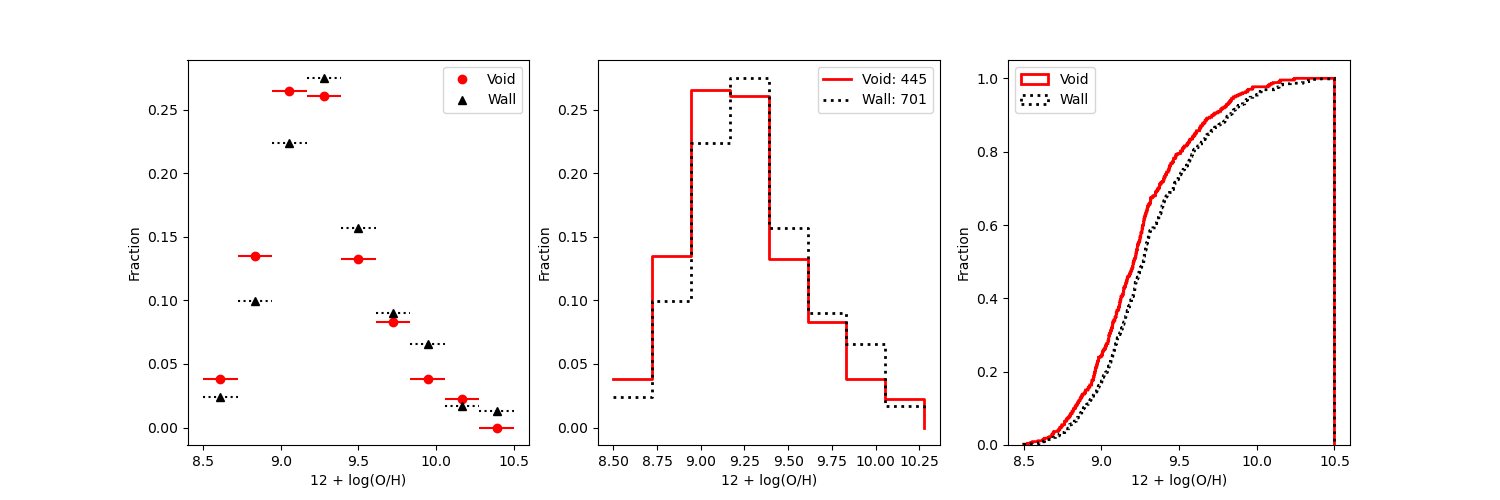

In [13]:
%matplotlib notebook

plt.figure(figsize=(15,5))


plt.subplot(131)
param_hist_scatter(void_table, wall_table, 'Z12logOH', bins)

plt.subplot(132)
param_hist(void_table, wall_table, 'Z12logOH', bins)

plt.subplot(133)
param_CDF(void_table, wall_table, 'Z12logOH', hist_range)

# Bin by metallicity

### Low metallicity (Z < 7.6)

/anaconda/envs/python3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)


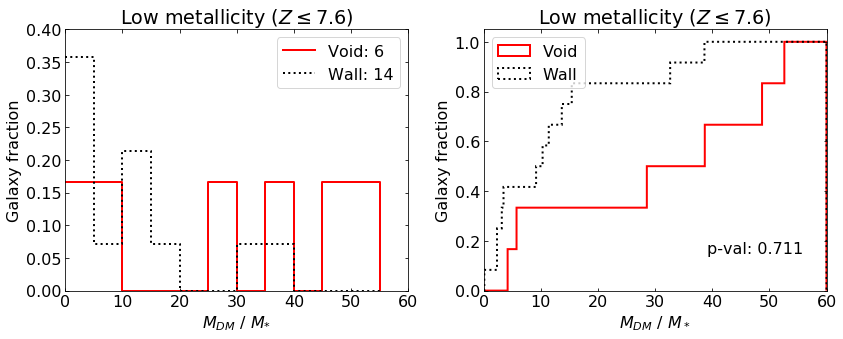

In [8]:
vboolean = void_table['Z12logOH_N2O2'] <= 7.6
wboolean = wall_table['Z12logOH_N2O2'] <= 7.6

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
low_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
low_void = void_table['Mdark_Mstar_ratio'][vboolean].data
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_low'], _ = np.histogram(low_void, bins)
count_table['w_low'], _ = np.histogram(low_wall, bins)
###########################################################################

DM_SM_hist(low_void, low_wall, y_max=0.4, plot_title='Low metallicity ($Z \leq 7.6$)')

### Middle metallicity (7.6 < Z < 8.2)

/anaconda/envs/python3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/anaconda/envs/python3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


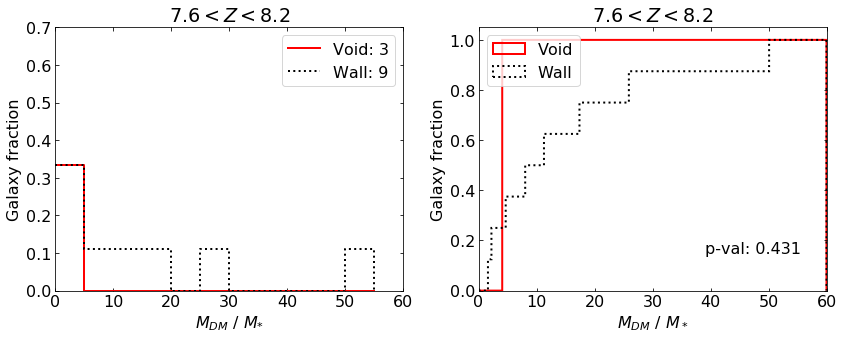

In [9]:
vboolean = np.logical_and(void_table['Z12logOH_N2O2'] > 7.6, void_table['Z12logOH_N2O2'] < 8.2)
wboolean = np.logical_and(wall_table['Z12logOH_N2O2'] > 7.6, wall_table['Z12logOH_N2O2'] < 8.2)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
mid_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
mid_void = void_table['Mdark_Mstar_ratio'][vboolean].data
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_mid'], _ = np.histogram(mid_void, bins)
count_table['w_mid'], _ = np.histogram(mid_wall, bins)
###########################################################################

DM_SM_hist(mid_void, mid_wall, y_max=0.7, plot_title='$7.6 < Z < 8.2$')

### High metallicity (Z > 8.2)

/anaconda/envs/python3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)


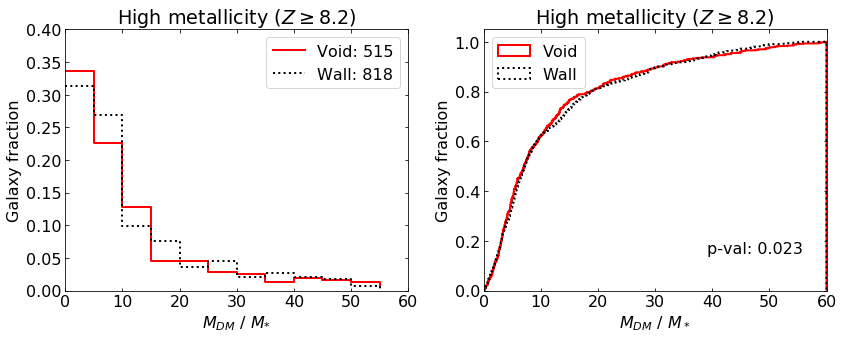

In [10]:
vboolean = void_table['Z12logOH_N2O2'] >= 8.2
wboolean = wall_table['Z12logOH_N2O2'] >= 8.2

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
high_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
high_void = void_table['Mdark_Mstar_ratio'][vboolean].data
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_high'], _ = np.histogram(high_void, bins)
count_table['w_high'], _ = np.histogram(high_wall, bins)
###########################################################################

DM_SM_hist(high_void, high_wall, y_max=0.4, plot_title='High metallicity ($Z \geq 8.2$)')

## Write histogram table to file

In [ ]:
count_table.write('abundance_hist_counts.txt', format='ascii.commented_header')

## Relationship between mass ratio and metallicity

In [23]:
v_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['Z12logOH'], frac=0.25)
w_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['Z12logOH'], frac=0.25)

<IPython.core.display.Javascript object>


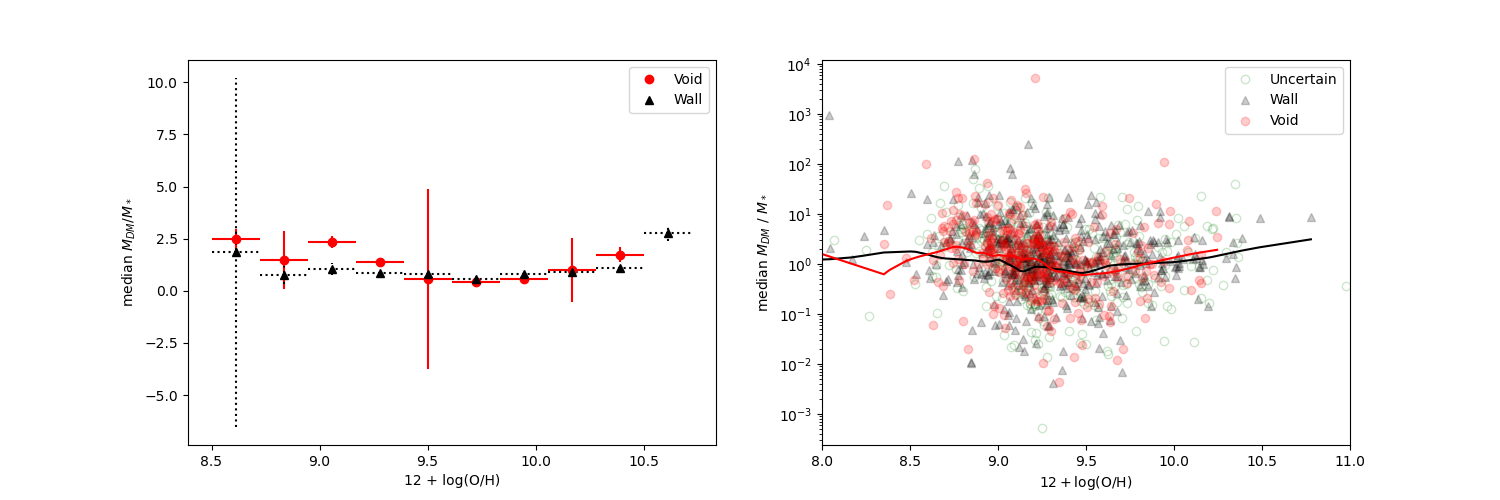

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3332: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
%matplotlib notebook

plt.figure(figsize=(15,5))


#------------------------------------------------------------------------------
plt.subplot(121)

median_hist(void_table, wall_table, 'Z12logOH', 'Mdark_Mstar_ratio', bins)
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

plt.semilogy(other_table['Z12logOH'], other_table['Mdark_Mstar_ratio'], 'go', 
             fillstyle='none', alpha=0.2, label='Uncertain')
plt.semilogy(wall_table['Z12logOH'], wall_table['Mdark_Mstar_ratio'], 
             'k^', alpha=0.2, label='Wall')
plt.semilogy(void_table['Z12logOH'], void_table['Mdark_Mstar_ratio'], 'ro', 
             alpha=0.2, label='Void')

plt.semilogy(w_smooth[:,0], w_smooth[:,1], 'k')
plt.semilogy(v_smooth[:,0], v_smooth[:,1], 'r')

plt.xlim(8,11)

plt.xlabel('$12 + \log$(O/H)')
plt.ylabel('median $M_{DM}$ / $M_*$')

plt.legend();
#------------------------------------------------------------------------------

## Mass-Metallicity relation

In [14]:
v_smooth = lowess(void_table['Z12logOH'], void_table['rabsmag'], frac=0.25)
w_smooth = lowess(wall_table['Z12logOH'], wall_table['rabsmag'], frac=0.25)

<IPython.core.display.Javascript object>


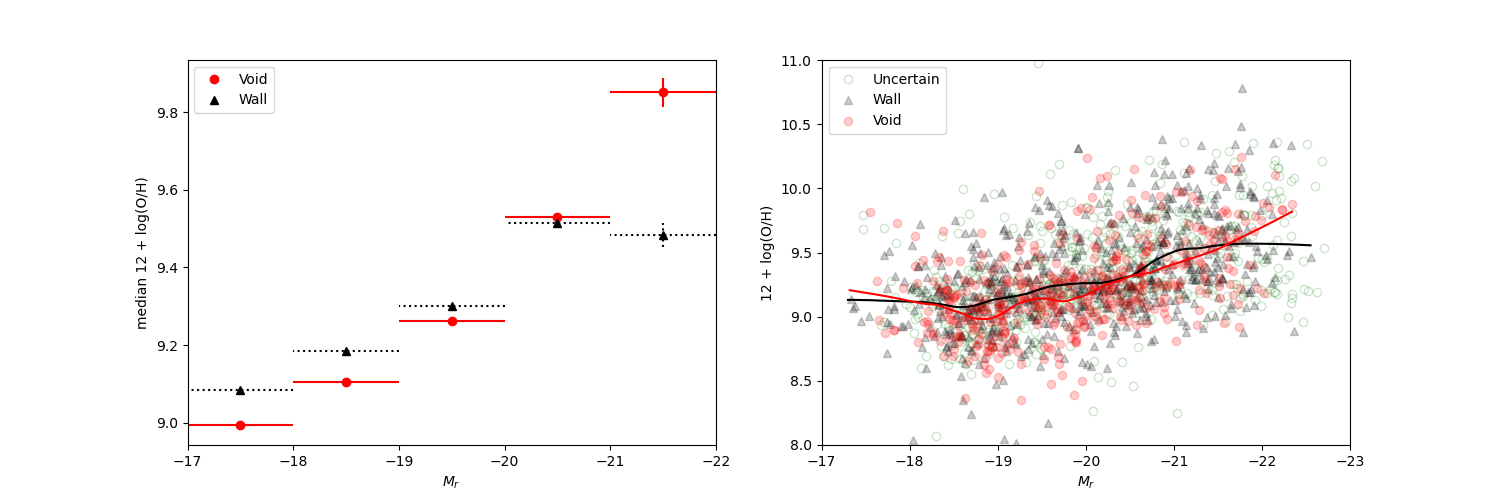

In [22]:
%matplotlib notebook

plt.figure(figsize=(15,5))

#------------------------------------------------------------------------------
plt.subplot(121)
median_hist(void_table, wall_table, 'rabsmag', 'Z12logOH', 
            np.array([-22, -21, -20, -19, -18]))

plt.xlim(-17,-22)
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

plt.plot(other_table['rabsmag'], other_table['Z12logOH'], 'go', fillstyle='none', alpha=0.2, label='Uncertain')
plt.plot(wall_table['rabsmag'], wall_table['Z12logOH'], 'k^', alpha=0.2, label='Wall')
plt.plot(void_table['rabsmag'], void_table['Z12logOH'], 'ro', alpha=0.2, label='Void')

plt.plot(w_smooth[:,0], w_smooth[:,1], 'k')
plt.plot(v_smooth[:,0], v_smooth[:,1], 'r')

plt.xlim(-17,-23)
plt.ylim(8,11)

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

plt.legend();
#------------------------------------------------------------------------------